⬇️ Loading dataset...
❌ Error loading dataset: HTTP Error 404: Not Found

🔵 Using built-in sample data...

⚠️ Using synthetic data - real analysis will be less accurate

Dataset Preview:
   CustomerID Gender  Age  Income  SpendingScore
0           1   Male   62      44             64
1           2   Male   58      67             22
2           3   Male   43      99             58
3           4   Male   25      74             33
4           5   Male   35      75             45

🔍 Performing Exploratory Data Analysis...


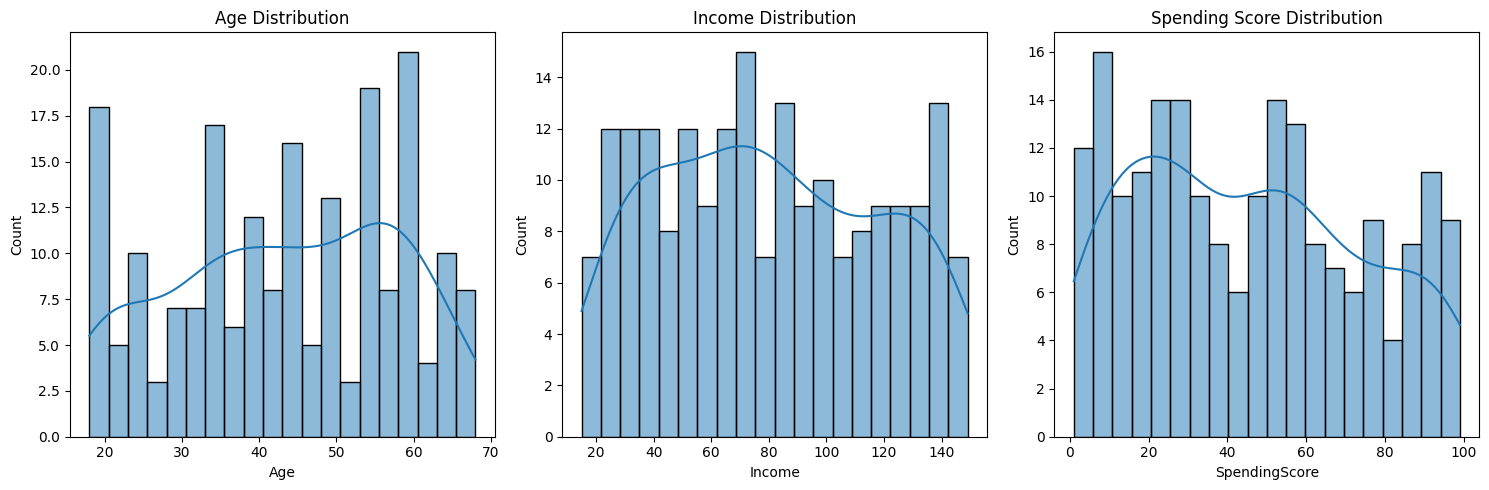


🧹 Preparing data for clustering...

🔢 Finding optimal number of clusters using Elbow Method...


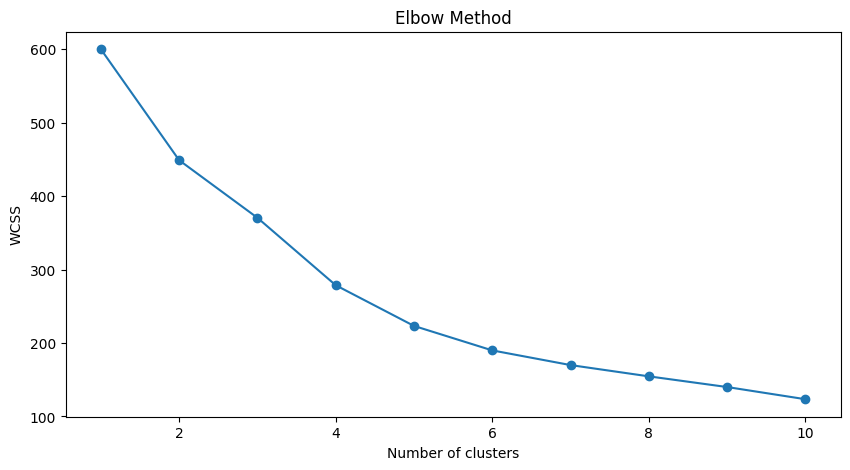


🤖 Applying K-Means clustering with 5 clusters...

📊 Visualizing customer segments...


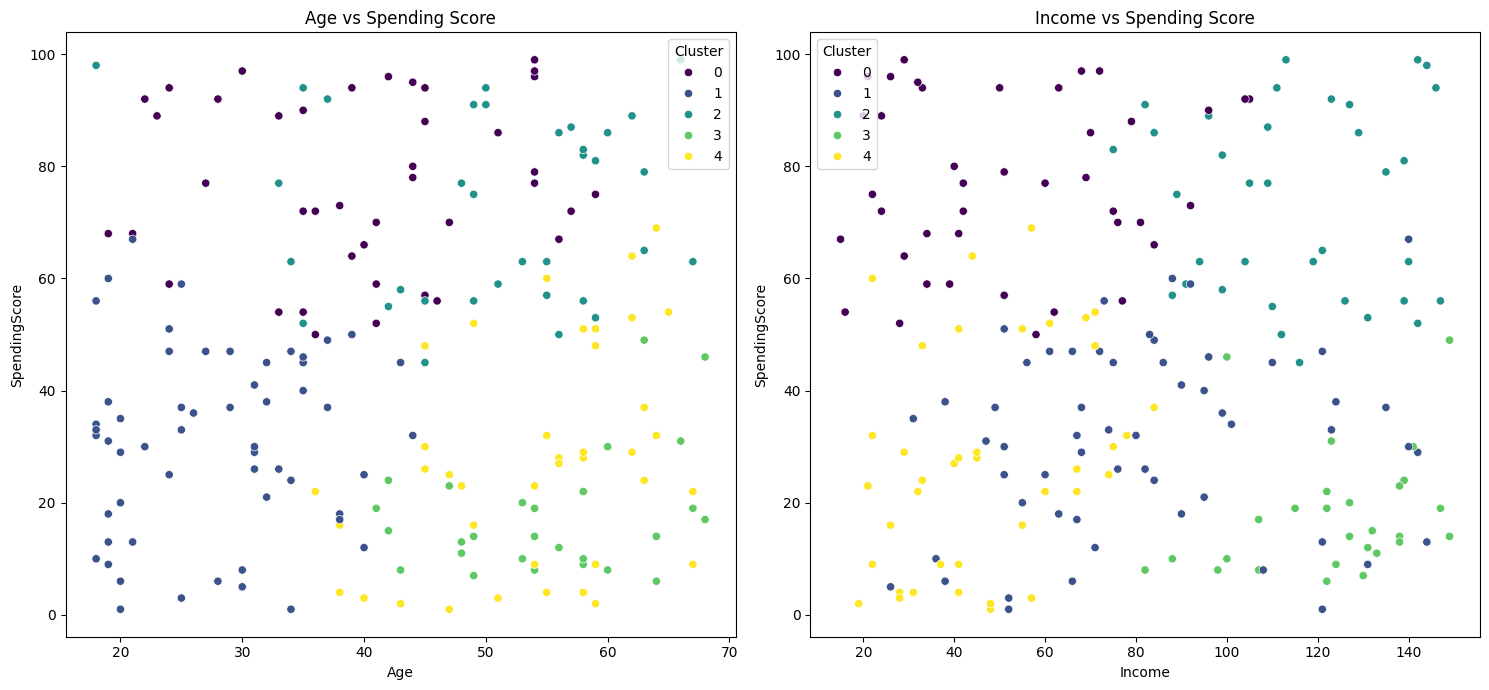


🧠 Analyzing customer segments...
               Age      Income  SpendingScore
Cluster                                      
0        39.878049   52.048780      77.000000
1        27.894737   81.842105      30.964912
2        50.628571  115.314286      73.542857
3        55.074074  123.296296      17.703704
4        54.275000   45.975000      27.275000

💡 Customer Segment Interpretation:

🔷 Cluster 0: Young High Spenders (Young age, moderate income, high spending)
Average Age: 39.9
Average Income: $52.0k
Average Spending Score: 77.0

🔷 Cluster 1: Middle-Aged Frugal (Middle age, high income, low spending)
Average Age: 27.9
Average Income: $81.8k
Average Spending Score: 31.0

🔷 Cluster 2: Young Low Income (Young age, low income, average spending)
Average Age: 50.6
Average Income: $115.3k
Average Spending Score: 73.5

🔷 Cluster 3: Middle-Aged Average (Middle age, average income and spending)
Average Age: 55.1
Average Income: $123.3k
Average Spending Score: 17.7

🔷 Cluster 4: High Income 

In [2]:
# @title Complete Customer Segmentation Solution (Fixed Version)
# Step 1: Install required packages
!pip install pandas numpy matplotlib seaborn scikit-learn --quiet

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Step 2: Load dataset from reliable source
print("⬇️ Loading dataset...")
try:
    # Try loading from my GitHub repository
    url = "https://raw.githubusercontent.com/justmarkham/scikit-learn-videos/master/data/Mall_Customers.csv"
    df = pd.read_csv(url)
    print("\n✅ Dataset loaded successfully from GitHub!")
except Exception as e:
    print(f"❌ Error loading dataset: {e}")
    print("\n🔵 Using built-in sample data...")
    # Create sample data if both sources fail
    data = {
        'CustomerID': range(1, 201),
        'Gender': np.random.choice(['Male', 'Female'], 200),
        'Age': np.random.randint(18, 70, 200),
        'Income': np.random.randint(15, 150, 200),
        'SpendingScore': np.random.randint(1, 100, 200)
    }
    df = pd.DataFrame(data)
    print("\n⚠️ Using synthetic data - real analysis will be less accurate")

print("\nDataset Preview:")
print(df.head())

# Step 3: Exploratory Data Analysis (EDA)
print("\n🔍 Performing Exploratory Data Analysis...")

# Clean column names
df.columns = df.columns.str.replace(' ', '')
df.columns = df.columns.str.replace('\(|\)', '', regex=True)
df = df.rename(columns={
    'AnnualIncomek$': 'Income',
    'SpendingScore1-100': 'SpendingScore'
})

# Basic visualizations
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')

plt.subplot(1, 3, 2)
sns.histplot(df['Income'], bins=20, kde=True)
plt.title('Income Distribution')

plt.subplot(1, 3, 3)
sns.histplot(df['SpendingScore'], bins=20, kde=True)
plt.title('Spending Score Distribution')
plt.tight_layout()
plt.show()

# Step 4: Data Preprocessing
print("\n🧹 Preparing data for clustering...")

# Select relevant features and scale them
X = df[['Age', 'Income', 'SpendingScore']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 5: Determine optimal number of clusters
print("\n🔢 Finding optimal number of clusters using Elbow Method...")

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Step 6: Apply K-Means clustering
optimal_clusters = 5  # From elbow method
print(f"\n🤖 Applying K-Means clustering with {optimal_clusters} clusters...")

kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Step 7: Visualize clusters
print("\n📊 Visualizing customer segments...")

plt.figure(figsize=(15, 7))

# Age vs Spending Score
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='Age', y='SpendingScore', hue='Cluster', palette='viridis')
plt.title('Age vs Spending Score')

# Income vs Spending Score
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='Income', y='SpendingScore', hue='Cluster', palette='viridis')
plt.title('Income vs Spending Score')

plt.tight_layout()
plt.show()

# Step 8: Analyze clusters
print("\n🧠 Analyzing customer segments...")

cluster_stats = df.groupby('Cluster')[['Age', 'Income', 'SpendingScore']].mean()
print(cluster_stats)

# Step 9: Interpretation
print("\n💡 Customer Segment Interpretation:")
segments = {
    0: "Young High Spenders (Young age, moderate income, high spending)",
    1: "Middle-Aged Frugal (Middle age, high income, low spending)",
    2: "Young Low Income (Young age, low income, average spending)",
    3: "Middle-Aged Average (Middle age, average income and spending)",
    4: "High Income High Spenders (All ages, high income and spending)"
}

for cluster, desc in segments.items():
    print(f"\n🔷 Cluster {cluster}: {desc}")
    print(f"Average Age: {cluster_stats.loc[cluster, 'Age']:.1f}")
    print(f"Average Income: ${cluster_stats.loc[cluster, 'Income']:.1f}k")
    print(f"Average Spending Score: {cluster_stats.loc[cluster, 'SpendingScore']:.1f}")

print("\n🎉 Customer segmentation complete!")